<a href="https://colab.research.google.com/github/Kingkor-Sarker/CSE422-project/blob/main/422_project_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving academic_success_dataset.csv to academic_success_dataset (6).csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



In [ ]:
# Load the dataset
df = pd.read_csv("/content/academic_success_dataset.csv")

# Show basic info and first few rows
df_info = df.info()
df_head = df.head()
df_shape = df.shape

df_info, df_head, df_shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4001 non-null   float64
 1   Application mode                3941 non-null   float64
 2   Application order               3998 non-null   float64
 3   Course                          3959 non-null   float64
 4   Daytime/evening attendance	     3984 non-null   float64
 5   Previous qualification          3990 non-null   float64
 6   Previous qualification (grade)  3952 non-null   float64
 7   Nacionality                     3978 non-null   float64
 8   Mother's qualification          4010 non-null   float64
 9   Father's qualification          3974 non-null   float64
 10  Mother's occupation             3988 non-null   float64
 11  Father's occupation             3999 non-null   float64
 12  Admission grade                 39

(None,
    Marital status  Application mode  Application order  Course  \
 0             1.0              17.0                5.0   171.0   
 1             1.0              15.0                1.0  9254.0   
 2             1.0               NaN                5.0  9070.0   
 3             1.0              17.0                2.0  9773.0   
 4             2.0              39.0                1.0  8014.0   
 
    Daytime/evening attendance\t  Previous qualification  \
 0                           1.0                     1.0   
 1                           1.0                     1.0   
 2                           1.0                     1.0   
 3                           1.0                     1.0   
 4                           0.0                     1.0   
 
    Previous qualification (grade)  Nacionality  Mother's qualification  \
 0                           122.0          1.0                    19.0   
 1                           160.0          1.0                     1.0   
 2

In [ ]:
# Redefine df_cleaned from the original cleaned dataset (after dropping empty columns)
df_cleaned = df.drop(columns=["Unnamed: 25", "Unnamed: 26"])

# Strip whitespace or hidden characters from column names
df_cleaned.columns = df_cleaned.columns.str.strip()

# Drop rows where the target is missing
df_cleaned = df_cleaned.dropna(subset=["Target"])

# Fill missing numerical values with median
num_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df_cleaned.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Check shape and confirm no missing values
df_cleaned_shape = df_cleaned.shape
remaining_missing = df_cleaned.isnull().sum().sum()

df_cleaned_shape, remaining_missing


((3971, 25), np.int64(0))

In [ ]:
print(df_cleaned["Target"].value_counts())
print(df_cleaned["Target"].value_counts(normalize=True) * 100)

Target
Graduate    1979
Dropout     1273
Enrolled     719
Name: count, dtype: int64
Target
Graduate    49.836313
Dropout     32.057416
Enrolled    18.106270
Name: proportion, dtype: float64


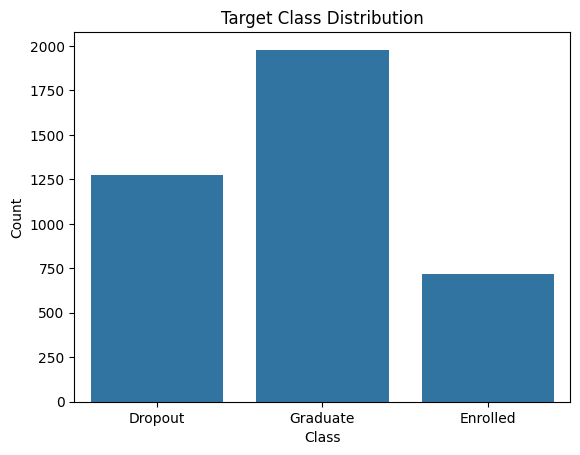

In [ ]:
sns.countplot(x="Target", data=df_cleaned)
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
#encode
label_encoders = {}
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

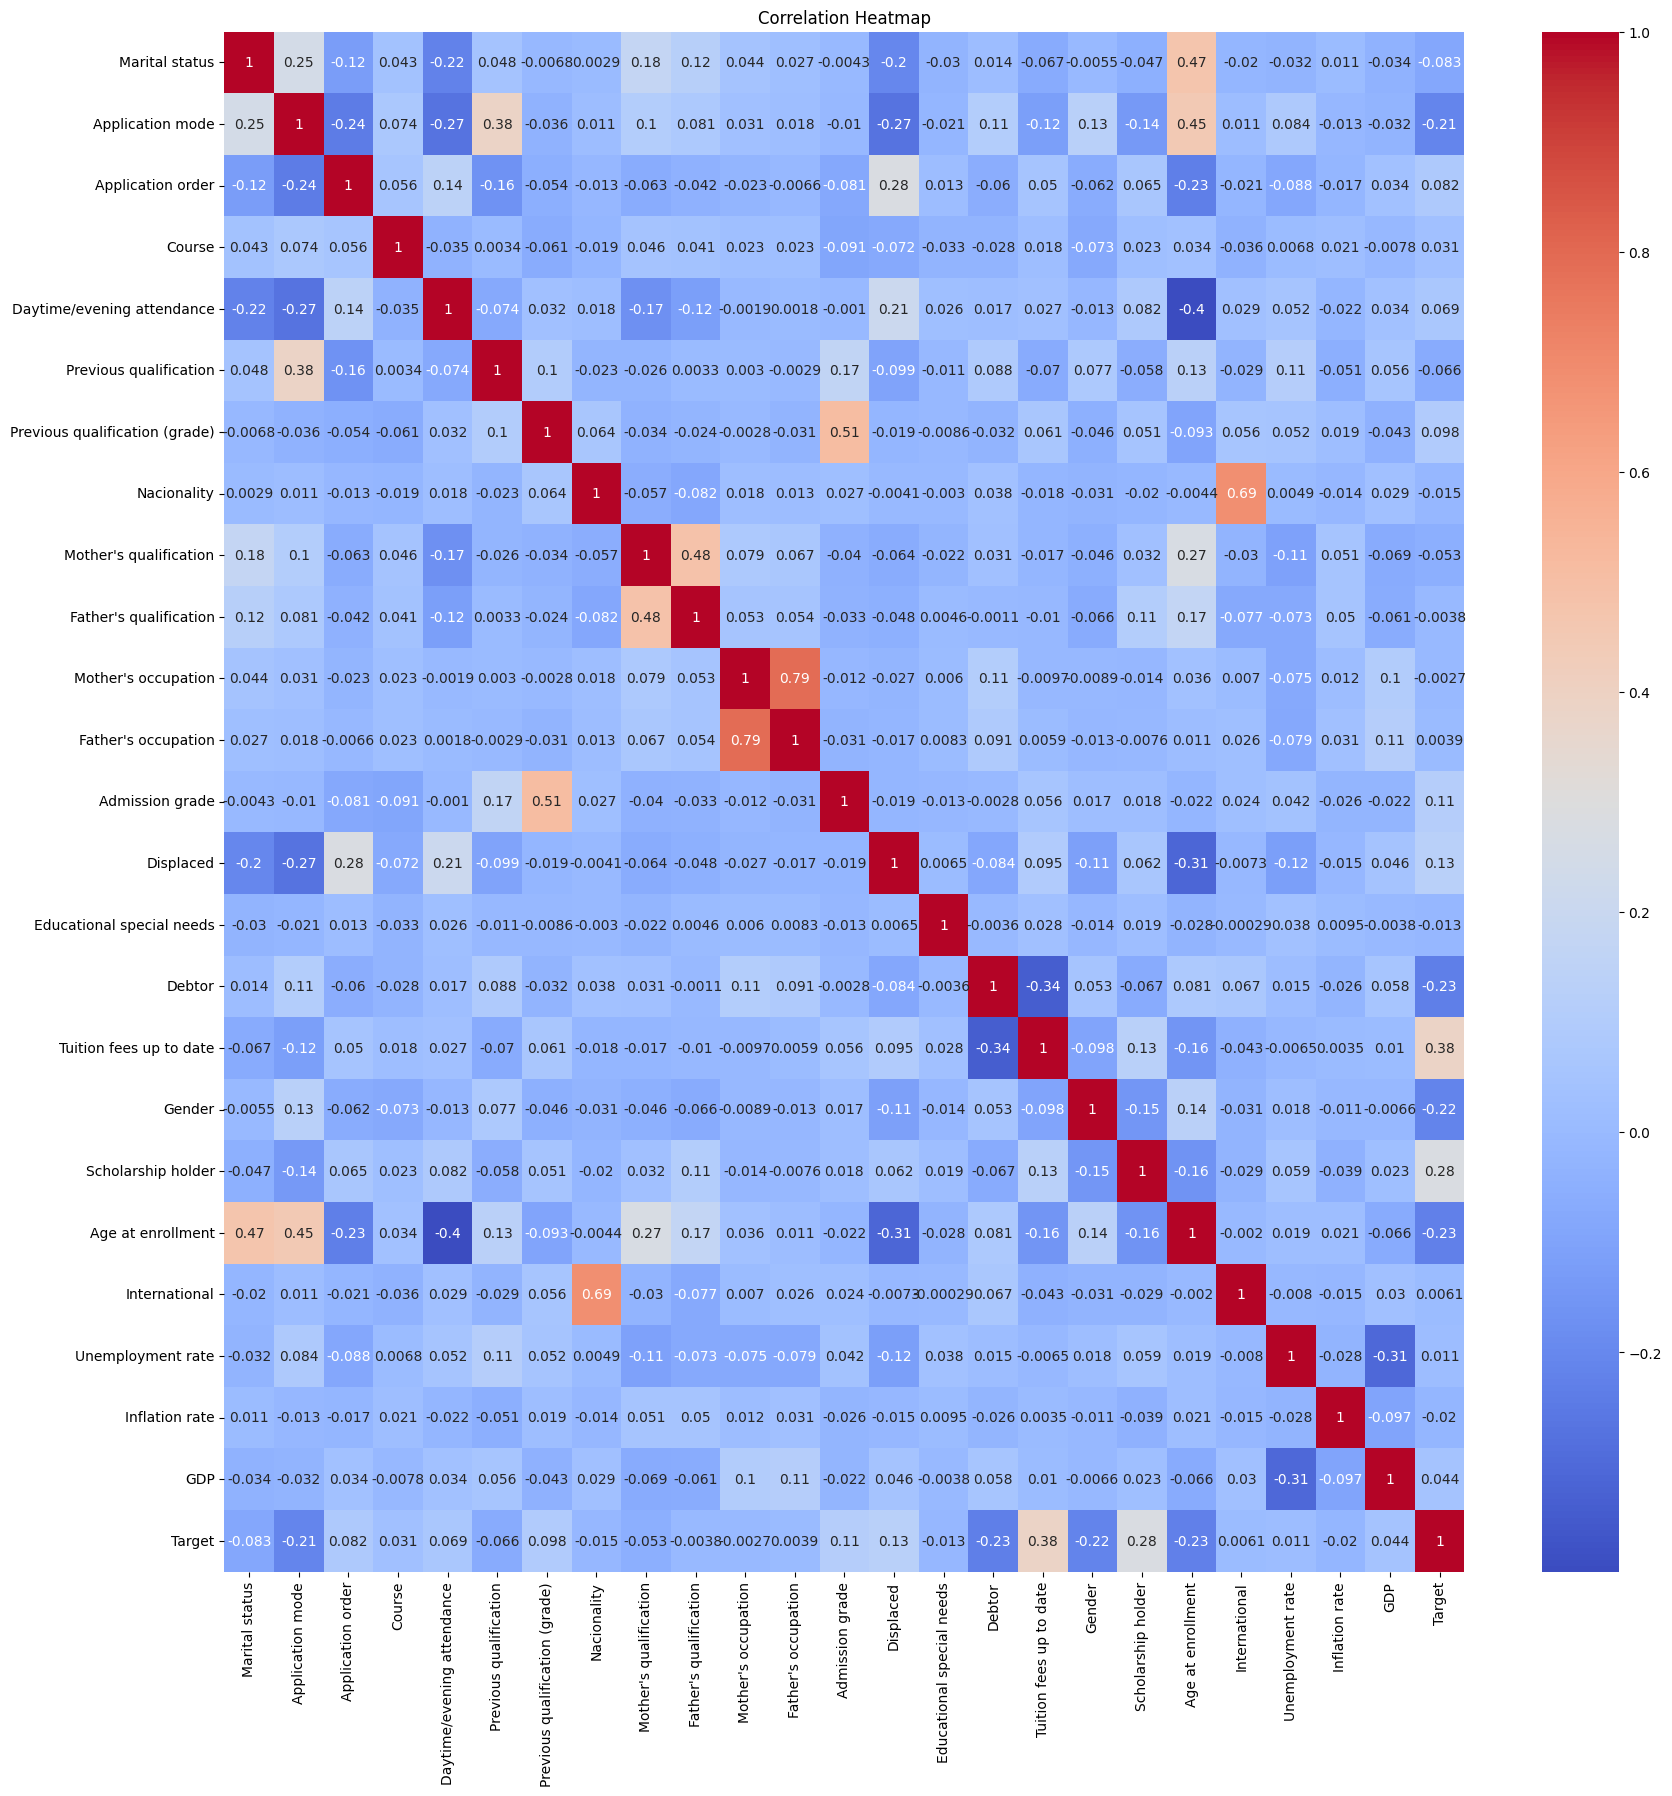

In [ ]:
#heatmap
plt.figure(figsize=(20, 20))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# cols_to_drop = [
#     "Application mode",
#     "Mother's qualification",
#     "Father's qualification", "Mother's occupation", "Father's occupation",
#     "Nacionality", "Educational special needs", "International",
#     "Unemployment rate", "Inflation rate", "GDP", "Course"
# ]
# df_cleaned = df_cleaned.drop(columns=cols_to_drop)


In [ ]:
# #heatmap
# plt.figure(figsize=(20, 20))
# correlation_matrix = df_cleaned.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()

In [ ]:
#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned.drop('Target', axis=1))
y = df_cleaned['Target']


In [ ]:
#strip
# X = features, y = target
X = X_scaled  # Your scaled features
y = df_cleaned['Target']

# Use stratify=y to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2779, 24)
Test shape: (1192, 24)


In [ ]:
#KNN model training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.5604026845637584
KNN Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.55       382
           1       0.27      0.19      0.22       216
           2       0.65      0.70      0.67       594

    accuracy                           0.56      1192
   macro avg       0.48      0.48      0.48      1192
weighted avg       0.54      0.56      0.55      1192



In [ ]:
#Decisition tree tranning
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.5218120805369127
Decision Tree Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       382
           1       0.24      0.23      0.24       216
           2       0.62      0.65      0.63       594

    accuracy                           0.52      1192
   macro avg       0.46      0.46      0.46      1192
weighted avg       0.52      0.52      0.52      1192



In [ ]:
#Nural network tranning
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Neural Net Report:\n", classification_report(y_test, y_pred_nn))


Neural Network Accuracy: 0.575503355704698
Neural Net Report:
               precision    recall  f1-score   support

           0       0.60      0.54      0.57       382
           1       0.28      0.21      0.24       216
           2       0.63      0.73      0.68       594

    accuracy                           0.58      1192
   macro avg       0.51      0.49      0.50      1192
weighted avg       0.56      0.58      0.56      1192



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


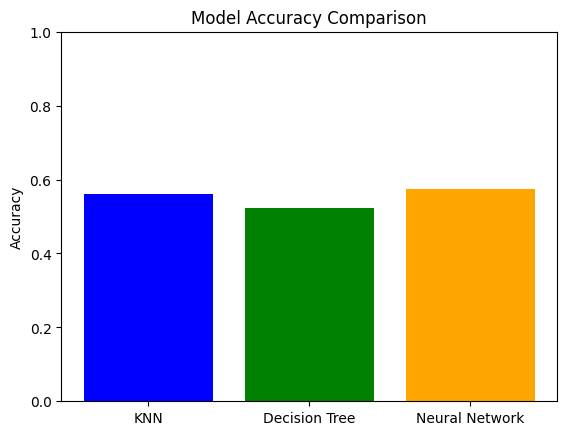

In [ ]:
import matplotlib.pyplot as plt

accuracies = [
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_nn)
]

models = ['KNN', 'Decision Tree', 'Neural Network']

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1': f1_score(y_true, y_pred, average='weighted')
    }

metrics_knn = get_metrics(y_test, y_pred_knn)
metrics_dt = get_metrics(y_test, y_pred_dt)
metrics_nn = get_metrics(y_test, y_pred_nn)

print("KNN:", metrics_knn)
print("Decision Tree:", metrics_dt)
print("Neural Network:", metrics_nn)


KNN: {'Precision': 0.5428927726946581, 'Recall': 0.5604026845637584, 'F1': 0.5501248918950069}
Decision Tree: {'Precision': 0.5156761575552756, 'Recall': 0.5218120805369127, 'F1': 0.5184113650218728}
Neural Network: {'Precision': 0.5579012661583401, 'Recall': 0.575503355704698, 'F1': 0.5629638302893311}


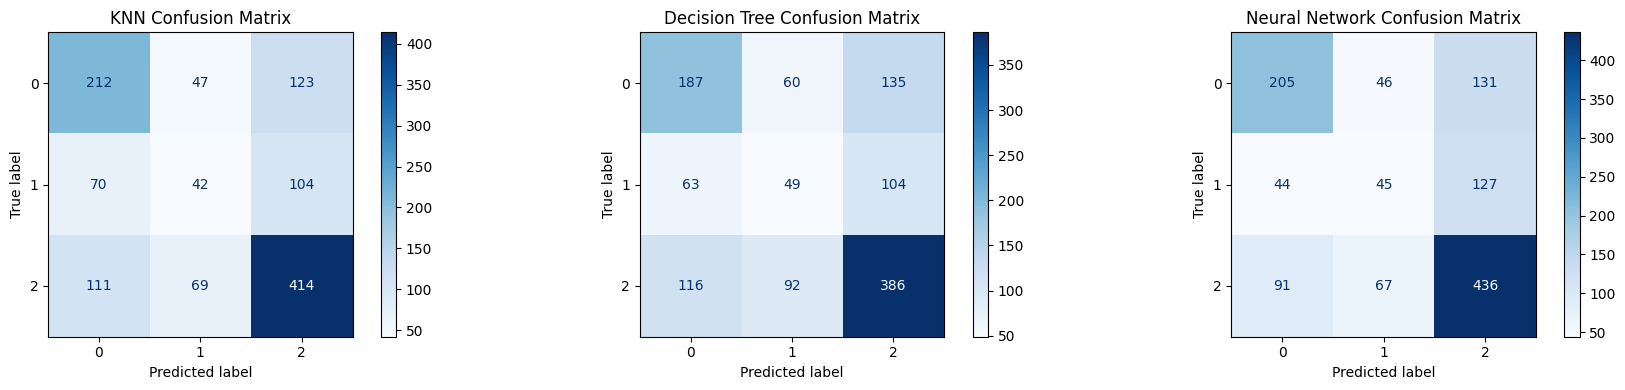

In [ ]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

for ax, model_name, y_pred in zip(
    axs,
    ['KNN', 'Decision Tree', 'Neural Network'],
    [y_pred_knn, y_pred_dt, y_pred_nn]
):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="Blues")
    ax.set_title(f'{model_name} Confusion Matrix')

plt.tight_layout()
plt.show()


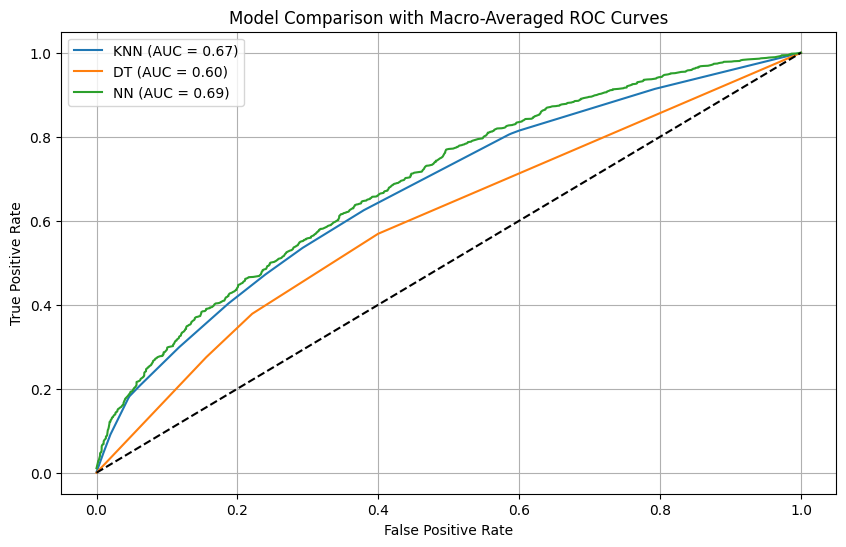

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Let's say: 0 = Enrolled, 1 = Dropout, 2 = Graduate
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

results = {}

for name, model in [('KNN', knn), ('DT', dtree), ('NN', nn)]:
    y_proba = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average AUC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    results[name] = {"fpr_tpr": (all_fpr, mean_tpr), "roc_auc": macro_auc}

# Plotting like your friend
plt.figure(figsize=(10, 6))
for name, res in results.items():
    fpr, tpr = res["fpr_tpr"]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Model Comparison with Macro-Averaged ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Model Performance Comparison:")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}")


Model Performance Comparison:
KNN Accuracy: 0.56
Decision Tree Accuracy: 0.52
Neural Network Accuracy: 0.58


In [ ]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.55      0.55       382
           1       0.27      0.19      0.22       216
           2       0.65      0.70      0.67       594

    accuracy                           0.56      1192
   macro avg       0.48      0.48      0.48      1192
weighted avg       0.54      0.56      0.55      1192

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       382
           1       0.24      0.23      0.24       216
           2       0.62      0.65      0.63       594

    accuracy                           0.52      1192
   macro avg       0.46      0.46      0.46      1192
weighted avg       0.52      0.52      0.52      1192

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       382
           1       0.28    

In [ ]:
# Precision, Recall, F1 for each model
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')

knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')

knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')


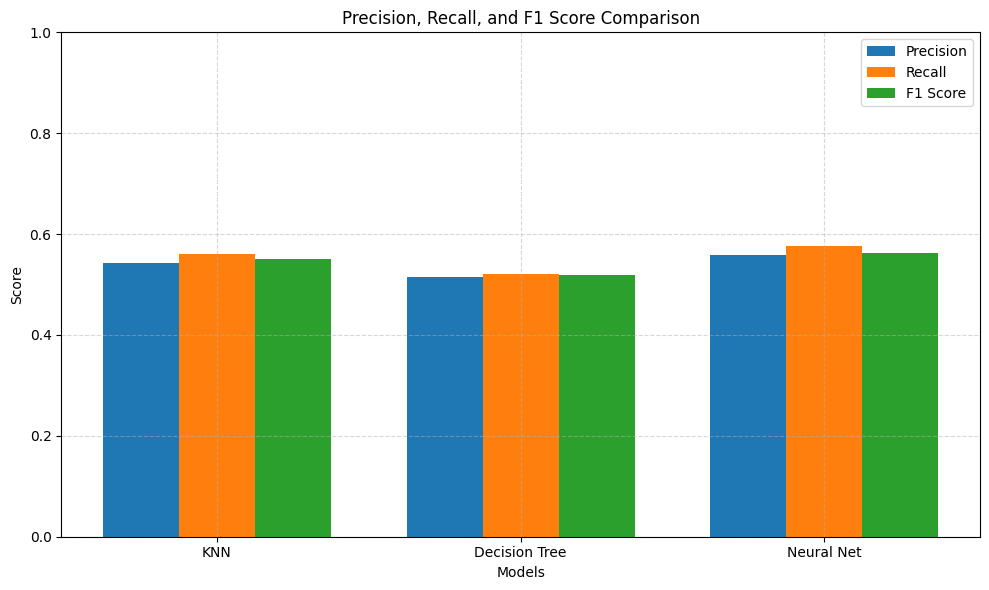

In [ ]:
# Labels and values
models = ['KNN', 'Decision Tree', 'Neural Net']
precision_scores = [knn_precision, dt_precision, nn_precision]
recall_scores = [knn_recall, dt_recall, nn_recall]
f1_scores = [knn_f1, dt_f1, nn_f1]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision_scores, width=width, label='Precision')
plt.bar(x, recall_scores, width=width, label='Recall')
plt.bar(x + width, f1_scores, width=width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score Comparison')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
